In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
# Load landmarks and observation data

landmarks_file   = "./data/map_data.txt"
observation_file = "./data/observation/observations_000001.txt"

with open(landmarks_file) as f:
    x_land = []
    y_land = []
    id_land = []
    
    for line in f: 
        data = line.split()
        x_land.append(data[0])
        y_land.append(data[1])
        id_land.append(data[2])    
    
with open(observation_file) as f:
    x_obs = []
    y_obs = []
    
    for line in f: 
        data = line.split()
        x_obs.append(data[0])
        y_obs.append(data[1])

In [3]:
gt_x = 5.90658
gt_y = 2.4434
gt_theta = 0.013828

x_converted = []
y_converted = []

for x in x_obs:
    x_converted.append(
        gt_x * cos(gt_theta) + gt_y * sin(gt_theta) + float(x))

for y in y_obs:
    y_converted.append(
        gt_x * sin(gt_theta) + gt_y * cos(gt_theta) + float(y))

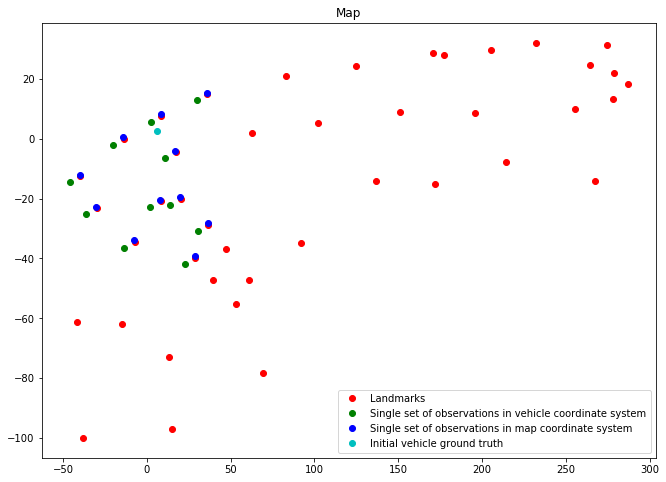

In [6]:
p1 = plt.plot(x_land, y_land, 'ro')
p2 = plt.plot(x_obs, y_obs, 'go')
p3 = plt.plot(x_converted, y_converted, 'bo')
p4 = plt.plot(gt_x, gt_y, 'co')

plt.rcParams["figure.figsize"] = [11, 8]

plt.title('Map')
plt.legend(
    (p1[0], p2[0], p3[0], p4[0]), 
    ('Landmarks', 
     'Single set of observations in vehicle coordinate system', 
     'Single set of observations in map coordinate system', 
     'Initial vehicle ground truth'
    )
)

plt.show()

In [8]:
# For each time step I create a plot of groundtruth point
# and particles around it and saves it to file


import pandas as pd
import numpy as np

# The plot window is ground_truth_coord -+ padding
padding = 10

# Number of the previous ground truth points to draw
gt_tail = 50

# Ground truth data
ground_truth = pd.read_csv("./data/gt_data.txt", delimiter=" ", names=["x", "y", "id"])

# Map data to show landmarks
map_data = pd.read_csv("./data/map_data.txt", delimiter="\t", names=["x", "y", "id"])

def save_plot(idx):
    plt.clf()
    
    # plot landmarks
    plt.scatter(map_data["x"], map_data["y"], color="orange")
    
    # plot particles
    column_names = ["x", "y", "theta", "id"]
    
    particles = pd.read_csv("./output/particles{}.txt".format(idx), delimiter=" ", names=column_names)
    
    plt.scatter(particles["x"], particles["y"], color="r")
    
    # subset gt_tail previous ground truth points
    gt_prev = ground_truth.iloc[:idx]
    gt_prev = gt_prev.iloc[-gt_tail:]
    
    # subset current ground truth point
    gt_cur = gt.iloc[idx]
    x = gt_cur["x"]
    y = gt_cur["y"]
    
    # plot gt_tail previous ground truth points
    plt.scatter(gt_prev["x"], gt_prev["y"], color="g")
    
    # plot current ground truth point
    plt.scatter(gt_cur["x"], gt_cur["y"], color="b")
    
    # plot title
    plt.title("{} particles".format(len(particles)))
    
    # set axis so the window is centered around ground truth point
    plt.axis((x-padding, x+padding, y-padding, y+padding))
    
    # save file
    plt.savefig("../output_gif/image_%04d.png" % idx, format="PNG")
    
# for each ground truth point create and save the plot
for i in range(len(ground_truth)):
    save_plot(i)

FileNotFoundError: File b'./output/particles0.txt' does not exist